## Predict Quarter-finals World Cup 2022 Match

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import tensorflow as tf

In [2]:
data = "dataset/"
df_internationalmatches = pd.read_csv(data + "Results International Matches.csv")
df_wcmatches = pd.read_csv(data + "Data Predict.csv")

print(df_internationalmatches.shape)
print(df_wcmatches.shape)

(609, 19)
(4, 17)


In [3]:
df_internationalmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_score,away_score,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2018-09-06,Germany,France,84,82,85,85,85,82,0,0,15,1,1561.0,1726.0,UEFA Nations League,Munich,Germany,False
1,2018-09-06,Wales,Republic of Ireland,82,75,71,74,77,75,4,1,19,29,1536.0,1484.0,UEFA Nations League,Cardiff,Wales,False
2,2018-09-06,Slovenia,Bulgaria,72,70,76,69,72,67,1,2,55,47,1392.0,1416.0,UEFA Nations League,Ljubljana,Slovenia,False
3,2018-09-06,Austria,Sweden,80,76,77,75,75,75,2,0,23,13,1502.0,1565.0,Friendly,Vienna,Austria,False
4,2018-09-06,Netherlands,Peru,79,80,80,77,80,75,2,1,17,20,1540.0,1535.0,Friendly,Amsterdam,Netherlands,False


In [4]:
df_wcmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2022-12-09,Croatia,Brazil,80,85,83,85,78,83,12,1,1645.64,1841.30,FIFA World Cup,Al Rayyan,Qatar,True
1,2022-12-09,Netherlands,Argentina,82,86,82,84,83,82,8,3,1694.51,1773.88,FIFA World Cup,Lusail,Qatar,True
2,2022-12-10,Morocco,Portugal,79,83,73,83,78,84,22,9,1563.50,1676.56,FIFA World Cup,Doha,Qatar,True
3,2022-12-10,England,France,86,86,83,82,83,82,5,4,1728.47,1759.78,FIFA World Cup,Al Khor,Qatar,True


In [5]:
label = LabelEncoder()
ohc = OneHotEncoder()
scaler = StandardScaler()

In [6]:
ftr = []
for i in range(len(df_internationalmatches)):
    if df_internationalmatches.home_score[i] > df_internationalmatches.away_score[i]:
        ftr.append(0)
    elif df_internationalmatches.home_score[i] < df_internationalmatches.away_score[i]:
        ftr.append(2)
    else:
        ftr.append(1)
df_internationalmatches.neutral = label.fit_transform(df_internationalmatches.neutral)
df_internationalmatches['FTR'] = ftr

In [7]:
columns = ['FTR', 'home_score', 'away_score', 'home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']

df_internationalmatches = df_internationalmatches[columns]
df_internationalmatches.head()

,FTR,home_score,away_score,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,neutral
0,1,0,0,84,82,85,85,85,82,15,1,1561.0,1726.0,0
1,0,4,1,82,75,71,74,77,75,19,29,1536.0,1484.0,0
2,2,1,2,72,70,76,69,72,67,55,47,1392.0,1416.0,0
3,0,2,0,80,76,77,75,75,75,23,13,1502.0,1565.0,0
4,0,2,1,79,80,80,77,80,75,17,20,1540.0,1535.0,0


In [8]:
y_train_predict = ohc.fit_transform(df_internationalmatches['FTR'].to_numpy().reshape(-1,1)).toarray()
X_train = scaler.fit_transform(df_internationalmatches.iloc[:,3:].astype(float))

In [9]:
df_wcmatches.neutral = label.fit_transform(df_wcmatches.neutral)
X_test = scaler.fit_transform(df_wcmatches[['home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']].astype(float))

In [10]:
def plot_graph_accuracy(history, accuracy):
    plt.plot(history.history[accuracy])
    plt.xlabel("Epochs")
    plt.ylabel(accuracy)
    plt.show()
    
def plot_graph_loss(history, loss):
    plt.plot(history.history[loss])
    plt.xlabel("Epochs")
    plt.ylabel(loss)
    plt.show()

### Model predict matches in 90 - 120 minutes (Probability Home win, Draw, Away Win)

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_dim=X_train.shape[1], activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.002, l2=0.0005)),
    tf.keras.layers.Dense(10, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.002, l2=0.0005)),
    tf.keras.layers.Dense(y_train_predict.shape[1], activation='softmax')
])

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_predict, batch_size=10, epochs=500)

Epoch 1/500
61/61 [==============================] - 1s 2ms/step - loss: 1.3074 - accuracy: 0.4893
Epoch 2/500
61/61 [==============================] - 0s 2ms/step - loss: 1.2574 - accuracy: 0.4943
Epoch 3/500
61/61 [==============================] - 0s 1ms/step - loss: 1.2394 - accuracy: 0.5041
Epoch 4/500
61/61 [==============================] - 0s 1ms/step - loss: 1.2285 - accuracy: 0.5189
Epoch 5/500
61/61 [==============================] - 0s 1ms/step - loss: 1.2206 - accuracy: 0.5304
Epoch 6/500
61/61 [==============================] - 0s 1ms/step - loss: 1.2137 - accuracy: 0.5386
Epoch 7/500
61/61 [==============================] - 0s 1ms/step - loss: 1.2081 - accuracy: 0.5386
Epoch 8/500
61/61 [==============================] - 0s 1ms/step - loss: 1.2037 - accuracy: 0.5452
Epoch 9/500
61/61 [==============================] - 0s 1ms/step - loss: 1.1991 - accuracy: 0.5435
Epoch 10/500
61/61 [==============================] - 0s 1ms/step - loss: 1.1947 - accuracy: 0.5501
Epoch 11/

61/61 [==============================] - 0s 1ms/step - loss: 1.0575 - accuracy: 0.5632
Epoch 84/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0573 - accuracy: 0.5747
Epoch 85/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0558 - accuracy: 0.5714
Epoch 86/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0541 - accuracy: 0.5698
Epoch 87/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0535 - accuracy: 0.5747
Epoch 88/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0527 - accuracy: 0.5747
Epoch 89/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0508 - accuracy: 0.5780
Epoch 90/500
61/61 [==============================] - 0s 1ms/step - loss: 1.0493 - accuracy: 0.5681
Epoch 91/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0485 - accuracy: 0.5681
Epoch 92/500
61/61 [==============================] - 0s 2ms/step - loss: 1.0476 - accuracy: 0.5731
Epoch 93/500


61/61 [==============================] - 0s 2ms/step - loss: 0.9886 - accuracy: 0.5829
Epoch 164/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9869 - accuracy: 0.5813
Epoch 165/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9864 - accuracy: 0.5846
Epoch 166/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9862 - accuracy: 0.5829
Epoch 167/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9833 - accuracy: 0.5911
Epoch 168/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9852 - accuracy: 0.5780
Epoch 169/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9839 - accuracy: 0.5846
Epoch 170/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9836 - accuracy: 0.5780
Epoch 171/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9832 - accuracy: 0.5829
Epoch 172/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9830 - accuracy: 0.5878
Epoc

61/61 [==============================] - 0s 1ms/step - loss: 0.9544 - accuracy: 0.5813
Epoch 244/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9570 - accuracy: 0.5911
Epoch 245/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9544 - accuracy: 0.5977
Epoch 246/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9548 - accuracy: 0.5895
Epoch 247/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9545 - accuracy: 0.5829
Epoch 248/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9534 - accuracy: 0.6010
Epoch 249/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9528 - accuracy: 0.5846
Epoch 250/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9534 - accuracy: 0.5895
Epoch 251/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9539 - accuracy: 0.5911
Epoch 252/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9518 - accuracy: 0.5895
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.9375 - accuracy: 0.5895
Epoch 325/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9359 - accuracy: 0.5878
Epoch 326/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9364 - accuracy: 0.5846
Epoch 327/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9369 - accuracy: 0.5813
Epoch 328/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9364 - accuracy: 0.5846
Epoch 329/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9374 - accuracy: 0.5780
Epoch 330/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9369 - accuracy: 0.5829
Epoch 331/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9370 - accuracy: 0.5829
Epoch 332/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9366 - accuracy: 0.5764
Epoch 333/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9343 - accuracy: 0.5796
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.9270 - accuracy: 0.5813
Epoch 405/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9273 - accuracy: 0.5911
Epoch 406/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9249 - accuracy: 0.5977
Epoch 407/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9253 - accuracy: 0.5862
Epoch 408/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9256 - accuracy: 0.5895
Epoch 409/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9260 - accuracy: 0.5796
Epoch 410/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9255 - accuracy: 0.5878
Epoch 411/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9258 - accuracy: 0.5829
Epoch 412/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9254 - accuracy: 0.5993
Epoch 413/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9238 - accuracy: 0.5944
Epoc

61/61 [==============================] - 0s 2ms/step - loss: 0.9163 - accuracy: 0.5911
Epoch 485/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9192 - accuracy: 0.5796
Epoch 486/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9159 - accuracy: 0.5977
Epoch 487/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9125 - accuracy: 0.5862
Epoch 488/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9209 - accuracy: 0.5796
Epoch 489/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9175 - accuracy: 0.5895
Epoch 490/500
61/61 [==============================] - 0s 2ms/step - loss: 0.9166 - accuracy: 0.5961
Epoch 491/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9183 - accuracy: 0.5846
Epoch 492/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9191 - accuracy: 0.5928
Epoch 493/500
61/61 [==============================] - 0s 1ms/step - loss: 0.9179 - accuracy: 0.5961
Epoc

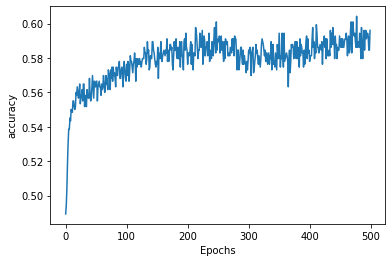

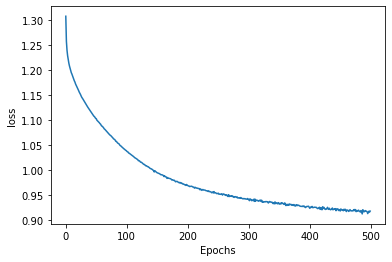

In [13]:
plot_graph_accuracy(history, 'accuracy')
plot_graph_loss(history, 'loss')

In [14]:
prob = model.predict(X_test)
print('Probability Result Quarter-finals World Cup 2022 Match in 90 - 120 Minutes')
print('==========================================================================')
for i in range(len(df_wcmatches)):
    print(f'{df_wcmatches.home_team[i]} vs {df_wcmatches.away_team[i]}')
    print(f'Home Win: {prob[i][0]:.5f}  Draw: {prob[i][1]:.5f}  Away Win: {prob[i][2]:.5f}\n')

Probability Result Quarter-finals World Cup 2022 Match in 90 - 120 Minutes
Croatia vs Brazil
Home Win: 0.18025  Draw: 0.48462  Away Win: 0.33513

Netherlands vs Argentina
Home Win: 0.47370  Draw: 0.41590  Away Win: 0.11040

Morocco vs Portugal
Home Win: 0.90908  Draw: 0.04998  Away Win: 0.04094

England vs France
Home Win: 0.69689  Draw: 0.14388  Away Win: 0.15923

